In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convert_RGB_to_monochrome_BW(image_1, threshold = 100):
    img_1 = plt.imread(image_1)
    img_2 = np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range (img_2.shape[0]):
        for j in range (img_2.shape[1]):
            if(img_1[i,j,0]/3 + img_1[i,j,1]/3 + img_1[i,j,1]/3)>threshold:
                img_2[i,j] = 0
            else:
                img_2[i,j] = 1
    return img_2

In [15]:
def m_f_0_and(l1,l2):
    n = len(l1)
    s = []
    for i in range (n):
        a = (l1[i] and l2[i])
        s.append(a)
    return s
#operator 0 degeri icin AND 1 degeri icin OR calistirir
def m_f_1_AND_or_OR(l1,operator = 0):
    if operator:
        if 1 in l1:
            s1 = 1
        else:
            s1 = 0
    else:
        if 0 in l1:
            s1 = 0
        else:
            s1 = 1

    return s1

def m_f_2_combine(l1,l2,operator = 0):
    a = m_f_0_and(l1,l2)
    return m_f_1_AND_or_OR(a,operator)

In [16]:
list_1 = [0, 0, 1, 0, 1]    
list_2 = [1, 1, 1, 1, 1]    

m_f_2_combine(list_1,list_2)

0

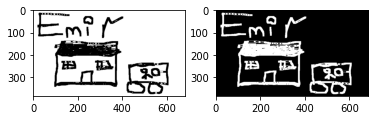

In [17]:
path_file = r"black_and_white.png"
img_1 = plt.imread(path_file)
img_2 = convert_RGB_to_monochrome_BW(path_file, 0.5)

plt.subplot(1,2,1),plt.imshow(img_1)
plt.subplot(1,2,2),plt.imshow(img_2, cmap = 'gray')
plt.show()

In [18]:
def my_dilation(img_1, mask):
    m = img_1.shape[0]
    n = img_1.shape[1]
    img_2 = np.zeros((m,n),dtype = 'uint8')
    
    for i in range (1,m-1):
        for j in range (1,n-1):
            x_1 = img_1[i,j] == mask[1][1]
            
            x_2 = img_1[i-1,j-1] == mask[0][0]
            x_3 = img_1[i-1,j] == mask[0][1]
            x_4 = img_1[i-1,j+1] == mask[0][2]

            x_5 = img_1[i+1,j-1] == mask[2][0]
            x_6 = img_1[i+1,j] == mask[2][1]
            x_7 = img_1[i+1,j+1] == mask[2][2]
            
            x_8 = img_1[i,j-1] == mask[1][0]
            x_9 = img_1[i,j+1] == mask[1][2]
            
            result_1 = x_1 or x_2 or x_3 or x_4 or x_5
            result_2 = x_6 or x_7 or x_8 or x_9
            
            result = result_1 or result_2
            
            img_2[i,j] = result
    return img_2

In [19]:
def define_mask_1():
    mask_1 = [[1,1,1],[1,1,1],[1,1,1]]
    #mask,mask[1][2],mask[0][0],mask[2][2]
    #for i in range(3):
    #    for j in range (3):
    #        print(mask[i][j], end=" ")
    #    print()
    return mask_1

def define_mask_2():
    mask_1 = [[0,0,0],[0,0,0],[0,0,0]]
    #mask,mask[1][2],mask[0][0],mask[2][2]
    #for i in range(3):
    #    for j in range (3):
    #        print(mask[i][j], end=" ")
    #    print()
    return mask_1

In [20]:
img_3 = my_dilation(img_2, define_mask_1())
img_4 = my_dilation(img_3, define_mask_1())
img_5 = my_dilation(img_4, define_mask_1())

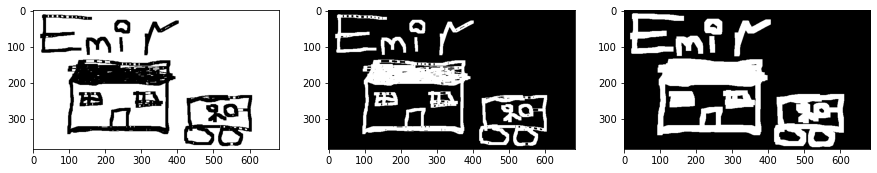

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img_1)
plt.subplot(1,3,2),plt.imshow(img_2, cmap = 'gray')
plt.subplot(1,3,3),plt.imshow(img_5, cmap = 'gray')
plt.show()